In [120]:
#for api calls use https://github.com/Yelp/yelp-fusion/blob/master/fusion/python/sample.py

# Dependencies
import requests
import json
import pprint
import pandas as pd

# Yelp developer API key
from config import gkey

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [134]:
best_route = ["Miami", "London", "Hamburg", "Denver", "Miami"]

In [135]:
# geocoordinates
start_loc = best_route[0]
target_loc2 = best_route[1]
target_loc3 = best_route[2]
target_loc4 = best_route[3]



# set up api_key dictionary
headers = {
        'Authorization': 'Bearer %s' % gkey,
    }

# set up a parameters dictionary
params = {
    "location": start_loc,
    "categories": "airports, All",
}
params2 = {
    "location": target_loc2,
    "categories": "airports, All",
}
params3 = {
    "location": target_loc3,
    "categories": "airports, All",
}
params4 = {
    "location": target_loc4,
    "categories": "airports, All",
}

# base url
base_url = "https://api.yelp.com/v3/businesses/search"

# run a request using our params dictionary
response = requests.request('GET', base_url, headers=headers, params=params).json()
response2 = requests.request('GET', base_url, headers=headers, params=params2).json()
response3 = requests.request('GET', base_url, headers=headers, params=params3).json()
response4 = requests.request('GET', base_url, headers=headers, params=params4).json()



In [136]:
# print the response url, avoid doing for public github repos in order to avoid exposing key
#pprint.pprint(response)

In [137]:
# Print the name and address of the first airport that appears
#print(start_loc)
sloclat = round(response["businesses"][0]["coordinates"]["latitude"], 2)
sloclong = round(response["businesses"][0]["coordinates"]["longitude"], 2)

#print(target_loc2)
ll2lat = round(response2["businesses"][0]["coordinates"]["latitude"], 2)
ll2long = round(response2["businesses"][0]["coordinates"]["longitude"], 2)

#print(target_loc3)
ll3lat = round(response3["businesses"][0]["coordinates"]["latitude"], 2)
ll3long = round(response3["businesses"][0]["coordinates"]["longitude"],2)

#print(target_loc4)
ll4lat = round(response4["businesses"][0]["coordinates"]["latitude"],2)
ll4long = round(response4["businesses"][0]["coordinates"]["longitude"],2)

print(start_loc, sloclat, sloclong)
print(target_loc2, ll2lat, ll2long)
print(target_loc3, ll3lat, ll3long)
print(target_loc4, ll4lat, ll4long)


Miami 25.79 -80.28
London 51.56 -0.07
Hamburg 53.63 10.0
Denver 39.86 -104.67


In [138]:
best_results_dict = pd.DataFrame(
    {"Destinations": [start_loc, target_loc2, target_loc3, target_loc4],
    "Longitudes": [sloclong, ll2long, ll3long, ll4long],
    "Latitudes": [sloclat, ll2lat, ll3lat, ll4lat]})
best_results_dict

,Destinations,Longitudes,Latitudes
0,Miami,-80.28,25.79
1,London,-0.07,51.56
2,Hamburg,10.00,53.63
3,Denver,-104.67,39.86


In [139]:
latmin=(best_results_dict["Latitudes"].min() - 5)
latmax=(best_results_dict["Latitudes"].max() + 5)
longmin=(best_results_dict["Longitudes"].min() -5)
longmax=(best_results_dict["Longitudes"].max() +5)

Text(0.5, 1.0, 'Best route is Miami to London to Hamburg to Denver.')

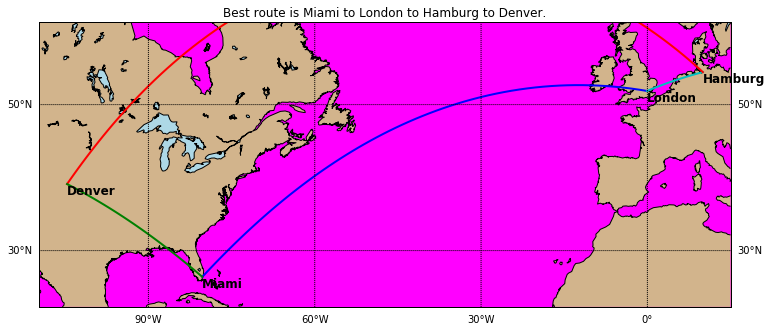

In [140]:
# create new figure, axes instances.
fig=plt.figure(figsize=(12, 8) )
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# set up map projection.
m = Basemap(llcrnrlon=longmin,llcrnrlat=latmin,urcrnrlon=longmax,urcrnrlat=latmax,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

# draw great circle routes
m.drawgreatcircle(sloclong, sloclat, ll2long,ll2lat,linewidth=2,color='b')
m.drawgreatcircle(ll2long, ll2lat, ll3long, ll3lat,linewidth=2,color='c')
m.drawgreatcircle(ll3long, ll3lat, ll4long, ll4lat,linewidth=2,color='r')
m.drawgreatcircle(ll4long, ll4lat, sloclong, sloclat,linewidth=2,color='g')



m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
m.drawmapboundary(fill_color='magenta')
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])


# When you use regular matplotlib commands, you need to get the mapping from the
# map projection to x,y that matplotlib uses. This is accomplished using the Basemap object,
# here which is assigned to be m()

x, y = m(sloclong, sloclat)
plt.text(x, y, start_loc, fontsize=12, fontweight='bold', ha='left', va='top', color='k')

x, y = m(ll2long, ll2lat)  
plt.text(x, y, target_loc2,fontsize=12,fontweight='bold', ha='left',va='top',color='k')

x, y = m(ll3long, ll3lat)  
plt.text(x, y, target_loc3,fontsize=12,fontweight='bold',ha='left',va='top',color='k')

x, y = m(ll4long, ll4lat)  
plt.text(x, y, target_loc4,fontsize=12,fontweight='bold',ha='left',va='top',color='k')


ax.set_title("Best route is " + start_loc + " to " + target_loc2 + " to " + target_loc3 + " to " + target_loc4 +".")